In [491]:
include("network_transmission_workplace.jl")

run_sim (generic function with 1 method)

In [501]:
Params = Dict("SimType"=>Scenario_sim, "ND"=>40, "NL"=>20, "NO"=>10, "p_contact"=>2/69, "Pisol"=>0.5, 
              "InfInit"=>1, "tD"=>1.0, "phi"=>1.0, "p_friend_contact"=>1.0)
PkgParams = Dict("p_fomite_contr"=>0.01, "p_fomite_trans"=>0.01, "Dtime"=>1/6,
                                 "Ltime"=>1/6, "PkgHlife"=>0.5)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true, "fixed_driver_pairs"=>true,
                  "fixed_loader_pairs"=>true, "is_window_open"=>false)
TestParams = Dict("new_comply_prob"=>0.5, "tperiod"=>4,
                  "protocol"=>LFD_mass_protocol, "specificity"=>0.999,
                  "delay"=>0, "test_pause"=>21)
NWeeks = 20
OCCPD = repeat([0.87,1.0,1.0,0.98,0.91,0.55,0],NWeeks)
incidence = 0.002 *(1 .- (1 .- 2*collect(0:NWeeks*7-1)./(NWeeks*7)).^2)
prevalence = cumsum(incidence) - cumsum(vcat(zeros(7),incidence[1:(end-7)]))
# Plots.plot(incidence)
# Plots.plot!(prevalence)

NP = Int64.(round.(3000 * OCCPD))
results = run_sim(Params, OCCPD, PkgParams, NP; is_network=true, is_pairs=true, 
          testing=true, PairParams=PairParams, TestParams=TestParams, Incidence=incidence, Prevalence=prevalence)

Dict{String,Array} with 23 entries:
  "Prevalence"                   => [0.0, 5.67347e-5, 0.000169388, 0.000337143,…
  "Isolated"                     => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "time"                         => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  131, 132…
  "FomiteInfs"                   => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "ContactInfs"                  => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "RoomInfs"                     => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "Exposed"                      => [0 0 … 1 1; 0 0 … 0 0; 0 0 … 0 0]
  "ExternalIntroductions"        => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "IsolatedDueToTestSymp"        => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "CustomerIntroductions"        => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "PackagesInfectiousOnDelivery" => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, …
  "Incidence"                    => [0.0, 5.67347e-5, 0.000112653, 0.000167755,…
  "PairInfs"                     => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "Present

420

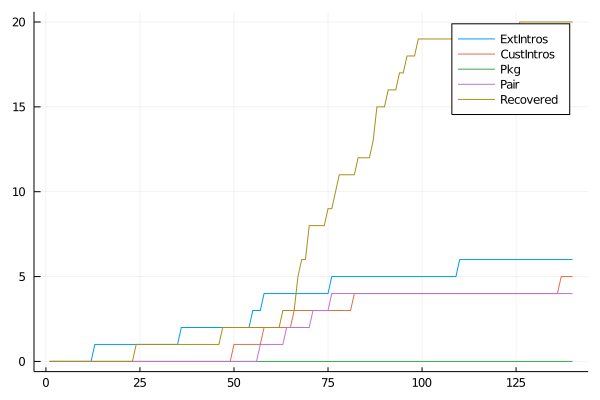

In [502]:
print(length(results["NetworkInfs"]))

#Plots.plot(results["time"],transpose(cumsum(sum(results["NetworkInfs"],dims=1),dims=2)))
#Plots.plot!(results["time"],transpose(cumsum(sum(results["ContactInfs"],dims=1),dims=2)))
#Plots.plot!(results["time"],transpose(cumsum(sum(results["RoomInfs"],dims=1),dims=2)))
Plots.plot(results["time"],transpose(cumsum(sum(results["ExternalIntroductions"],dims=1),dims=2)),label="ExtIntros")
Plots.plot!(results["time"],transpose(cumsum(sum(results["CustomerIntroductions"],dims=1),dims=2)),label="CustIntros")
Plots.plot!(results["time"],transpose(cumsum(sum(results["FomiteInfs"],dims=1),dims=2)),label="Pkg")
Plots.plot!(results["time"],transpose(cumsum(sum(results["PairInfs"],dims=1),dims=2)),label="Pair")
R = results["Recovered"]
Rsum = sum(R,dims=1)
Plots.plot!(results["time"],transpose(Rsum),label="Recovered")


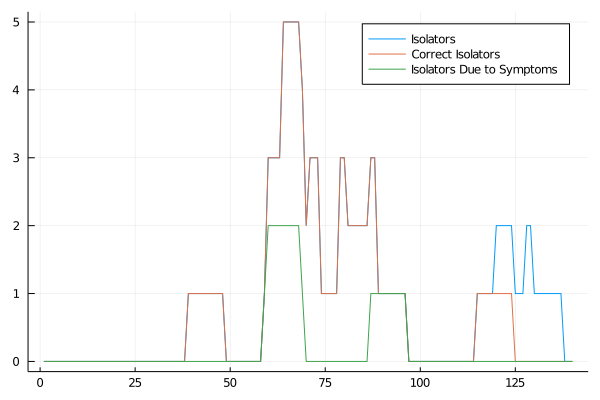

In [503]:
#Plots.plot(results["time"],transpose(sum(results["Infectious"],dims=1)),label="Infectious")
IS = results["Isolated"] 
Plots.plot(results["time"],transpose(sum(IS,dims=1)),label="Isolators")
IS1 = IS .- results["IsolatedDueToFalsePos"]
Plots.plot!(results["time"],transpose(sum(IS1,dims=1)),label="Correct Isolators")
IS2 = IS1 .- results["IsolatedDueToTestAsymp"] .- results["IsolatedDueToTestSymp"]
Plots.plot!(results["time"],transpose(sum(IS2,dims=1)),label="Isolators Due to Symptoms")
#Plots.plot!(results["time"],transpose(sum(results["IsolatedDueToFalsePos"],dims=1)),label="Test Isolation FalsePos")
#Plots.plot!(results["time"],100*results["Incidence"])

In [426]:
print(sum(results["Isolated"] .- results["IsolatedDueToFalsePos"])/10/sum(results["Recovered"],dims=1)[end])

0.3333333333333333

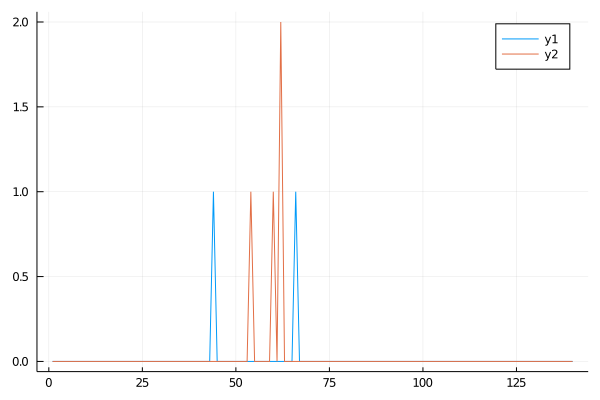

In [460]:
Plots.plot(results["time"], results["CustomersInfectedByDrivers"])
#Plots.plot!(results["time"], results["PackagesInfectiousOnDelivery"])
Plots.plot!(results["time"], results["CustomersInfectedByPkgs"])